# Statistical significance

It is helpful to define a result as being either statistically significant or not statistically significant when you plan to make a crisp decision based on a single result. If you don't plan to use this one result to make a clear decision, the concept of statistical significance is not necessary and is likely to be confusing or misleading.

## Introducting P values - P values are not very reproducible

In the following simulation, multiple data sets are randomly sampled from the same populations. 10 data points are sampled from Gaussians distributions with an SD = 5.0, and the population means differ by 5.0.

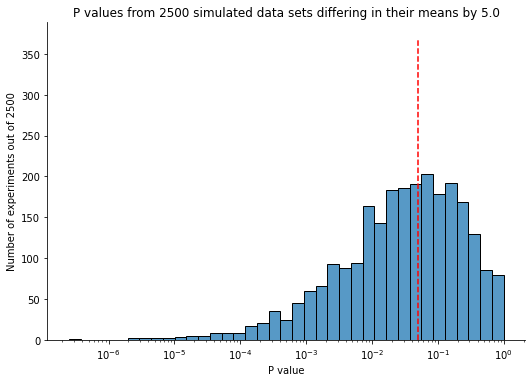

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

np.random.seed(111)

mean= 10
SD  = 5
N   = 10

p_values = []

for _ in range(2500):
    pop_1 = np.random.normal(loc=mean,   scale=SD, size=N)
    pop_2 = np.random.normal(loc=mean+5, scale=SD, size=N)

    stat, p_value = stats.ttest_ind(pop_1, pop_2)
    p_values.append(p_value)

sns.displot(p_values, log_scale=True, aspect=1.5)
plt.vlines(.05, 0, 370, colors='r', linestyles='dashed')
plt.xlabel("P value")
plt.ylabel("Number of experiments out of 2500")
plt.title("P values from 2500 simulated data sets differing in their means by 5.0");

In [19]:
np.percentile(p_values, [2.5, 97.5])

array([1.69152124e-04, 7.02604441e-01])

The middle 95% of the P value range from 0.000169 to 0.7026, a span covering more than three orders of magnitude! P values are nowhere near as reproducible as most people expect and therefore this should be regarded carefully while looking at reproducible studies.

Conclusions about statistical signficance are also less reproducible than most people would expect. Imagine than one experiment has a P value exactly equal to 0.05, if you repeat the experiment, your best guess is that the P value will be the same as last time. Half of the time random sampling of data will lead the P value to be larger than 0.05, and half of the time smaller. So the chance of statistical significance in a repeat experiment if the first one is right at the border of significance is 50%. Statisticians generalized this with other P values in first experiment. Even if this P value is 0.001, you can be far from sure that the repeat experiment will have a P value < 0.05.

| P value in 1st exp | Chance that P value in 2nd exp < 0.05 |
|:------------------ | ------------------------------------- |
| 0.10               | 38 %                                  |
| 0.05               | 50 %                                  |
| 0.01               | 73 %                                  |
| 0.001              | 91 %                                  |
| 0.00031            | 95 %                                  |

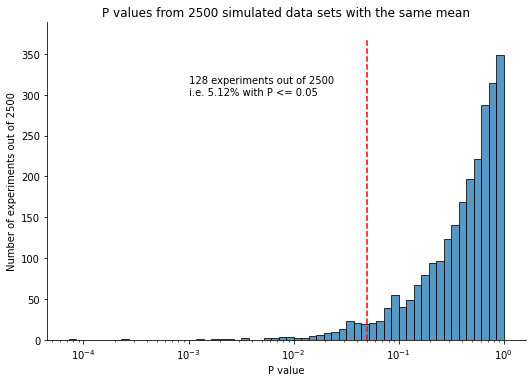

In [33]:
mean = 10
SD   = 5
N    = 10

p_values = []

for _ in range(2500):
    pop_1 = np.random.normal(loc=mean,   scale=SD, size=N)
    pop_2 = np.random.normal(loc=mean+0, scale=SD, size=N)

    stat, p_value = stats.ttest_ind(pop_1, pop_2)
    p_values.append(p_value)

sns.displot(p_values, log_scale=True, aspect=1.5)
plt.vlines(.05, 0, 370, colors='r', linestyles='dashed')
plt.xlabel("P value")
plt.ylabel("Number of experiments out of 2500")
signif = sum(np.array(p_values)<=0.05)
plt.text(x=0.001, y=300, s=f"{signif} experiments out of 2500 \ni.e. {100 * signif / 2500}% with P <= 0.05")
plt.title("P values from 2500 simulated data sets with the same mean");

### The sample size has a huge effect on the P value

The huge spread between the P values obtained with n=50 and n=3 below is due only to differences in sample size, as the samples have exactly the same means and SD in every case. Here the number of degrees of freedom equals $n_1 + n_2 - 2 = 2n - 2$.

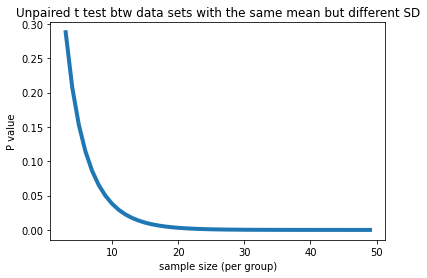

In [21]:
# two groups with different mean but same SD
mean1, mean2 = 10, 15
mean_diff = mean2 - mean1
SD = 5

p_values = []

for n in range(3, 50):
    t_ = mean_diff/(SD * (2/n)**0.5)
    p_values.append(2 * (1 - stats.t.cdf(x = abs(t_), df=2*n-2)))

sns.lineplot(x=list(range(3, 50)), y=p_values, lw=4)
plt.xlabel("sample size (per group)")
plt.ylabel("P value")
plt.title("Unpaired t test btw data sets with the same mean but different SD");

In [22]:
2 * (1 - stats.t.cdf(x = abs(mean_diff/(SD * (2/5)**0.5)), df=2*5-2))

0.15250228520801445

## Cumulative P values and ad hoc sample size decisions

Here we simulate the cumulative influence of the addition of samples to the previous set on the P value. The two populations are from a Gaussian distribution with the same mean and SD. An unpaired t-test is computed with n=5 in each group and the resulting P value is plotted. We repeat with one more value added to each group, and so on up to n=75. Here we show for sure that H0 is true.

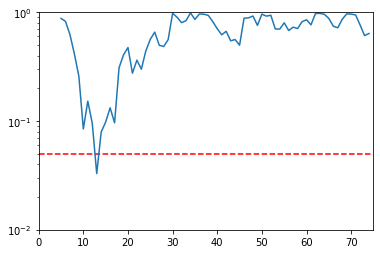

In [23]:
np.random.seed(111)
mean = 0
SD   = 1
N    = 75

pop_1 = np.random.normal(loc=mean, scale=SD, size=N)
pop_2 = np.random.normal(loc=mean, scale=SD, size=N)

p_values = []

for _ in range(5, N):
	subset_1 = pop_1[:_]
	subset_2 = pop_2[:_]
	
	stat, p_value = stats.ttest_ind(subset_1, subset_2)
	p_values.append(p_value)
	
plt.plot([_ for _ in range(5, N)], p_values)
plt.xlim((0,75))
plt.yscale('log')
plt.ylim((.01, 1))
plt.hlines(.05, 0, 75, colors='r', linestyles='dashed');

Imagine that we continue collecting data only when the result is not significant and stop when the result is statistically significant. If the experiment were continued after reaching significance, adding more data might then result in a conclusion that the results are not statistically significant (i.e. the curve goes up between 13 and 14 in the example above). But we'd never know this is the real life because we would have stopped once significance was reached! This kind of dynamic adjustment of the sample size is also called _sequential data analysis_.

## Comparing groups with confidence intervals and P values

If a 95% CI **does not contain the value of the null hypothesis**, then the result must be statistically significant with P < 0.05.

If a 95% CI **does contain the value of H0**, then the result must not be statistically significant with P > 0.05.

Also, if the CI for the difference between two means does not include zero (H0), then the result must be statistically significant (P < 0.05).
If the CI for the ratio of two proportions does not include 1.0 (H0), then the result must be statistically significant (P < 0.05).
If we are comparing a set of percentages against a hypothetical value of 100 and 95% CI of the mean of the percentages does not include 100, the the discrepancy must be statistically significant.

## Statistical significance and hypothesis testing

Statistical hypothesis testing automates decision-making. It reduces all finding to two conclusions, "statistically significant" or "not statistically significant".

### Type I and type II errors

Statistical hypothesis testing makes a decision based on the results of one comparison. When you make this deicision, there are two kinds of mistakes you can make:

|             | reject H0    | do not reject H0 |
|-------------|--------------|------------------|
| H0 is true  | type I error | (no error)       |
| H0 is false | (no error)   | type II error    |

- type I error: when there really is no difference (or association or correlation) between the populations, random sampling can lead to a difference large enough to be a statistically significant. Also called **false positive**. _E.g. send email to spam folder when good, or verdict guilty when did not commit the crime._
- type II error: when there really is a difference, random sampling (and small sample size) can lead to a difference small enough to be not statistically significant. Also called **falsed negative**. _E.g. place email iin inbox when spam, or verdict not guilty when did commit the crime._

_Another error, called type S error or type III, when the sign of the difference is backwards/reversed._

## Interpreting a result that is statistically significant

|             |  reject H0  | do not reject H0 |  total  |
|-------------|-------------|------------------|---------|
| H0 is true  |  A (type I) |        B         |  A + B  |
| H0 is false |      C      |   D (type II)    |  C + D  |
| Total       |    A + C    |      B + D       | A+B+C+D |

### The significance level ($\alpha$)

* If the null hypothesis is true, what is the probability that a particular experiment will collect data that generate a P value low enough to reject that null hypothesis?
* Of all experiments you could conduct when the null hypothesis is actually true, in what fraction will you reach a conclusion that the results are statistically significant?

The significance level only considers analyses where **H0 is true**. Of all experiments (A+B), the number of times H0 is rejected equals A, so $$ \alpha = \frac{\text{A}}{\text{A}+\text{B}}$$

### The False Positive Report Probability (FPRP)

* If a result is statistically significant, what is the probability that the null hypothesis is really true?
* Of all experiments that reach a statistically significant conclusion, what fraction are _false positive_ (type I error)?

The FPRP only considers analyses that **reject H0**. Of all these experiments (A+C), the number in which H0 is true equals A, so $$ \text{FPRP} = \frac{\text{A}}{\text{A}+\text{C}}$$

## The prior probability influences the FPRP

The FPRP value depends in part on the significance level and power you choose, but it also depends upon the context the experiment as summarized in the table below:

| prior probability | FPRP as P<0.05 | FPRP as 0.045<P<0.05 |
| ----------------- | -------------- | -------------------- |
|        0.0%       |      100%      |         100%         |
|        1.0%       |       86%      |          97%         |
|        10%        |       36%      |          78%         |
|        50%        |      5.9%      |          27%         |
|       100%        |      0.0%      |           0%         |

### Prior probability = 1%

Imagine we have planned a large sensible experiment, and we know the chance that our theory will end up being true is 1% What can we expect to happen if we test 1000 drugs?

- Of 1000 drugs screened we expect 10 (1%) that really work
- Of the 10 drugs that really work we expect to obtain a statistically significant result in 8 (80 % power)
- Of the 990 drugs that are really ineffective we expect to obtain a statistically significant result in 5% ($\alpha$ set to 0.05), i.e. 5% x 990 = 49 false positive
- Of 1000 tests of different drugs we therefore expect to obtain statistically significant difference in 8+49=57
- The FPRP equals 49/57=86%

This kind of experiment is not worth doing unless we use a much stricter value for $\alpha$ (e.g. 0.1% instead of 5%).

### Prior probability = 50%

```
             400 have P<0.05 (80% power)
            /
       500 work (prior probability=50%)
      /     \
     /       100 have P>0.05
1000 drugs
     \         25 have P<0.05 (5% significance level)
      \       /
       500 don't work
              \
               475 have P>0.05
```

The FPRP equals 25/425 = 5.9%.

Even perfectly performed experiments are less reproducible than most expect, and many statistically significant results are false positive in situations where false positive results are likely, e.g. with low prior probability in observational studies. Furthermore, if an experiment has low power to find the difference/effect you are looking for, you are likely to end up with a result that is not statistically significant even if the effect is real. And if the low power study does reach a conclusion that the effect is statistically significant, the results are hard to interpret, because the FPRP will be high and the effect size observed in that study is likely to be larger than the actual effect size because only large observed effects (even if due to chance) will be yield a P value less than 0.05. Experiments designed with low power cannot be very informative and it should not be surprising when they cannot be reproduced.

## Multiple comparisons concept

C:\Users\Sébastien\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


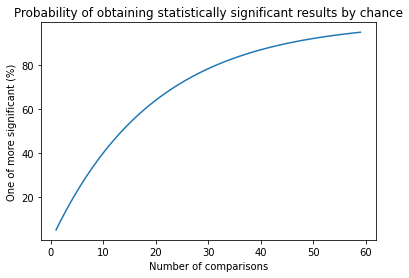

In [24]:
x = np.arange(1, 60)
ax = sns.lineplot(x, 100*(1 - .95**x))
ax.set_title("Probability of obtaining statistically significant results by chance")
ax.set_xlabel("Number of comparisons")
ax.set_ylabel("One of more significant (%)");

### The Bonferroni correction

The simplest approach to achieving a familywise error rate is to divide the value of $\alpha$ by the number of comparisons $\alpha / \text{K}$. This ensures that if all the null hypotheses are true, there is about a 95% chance of seing no statistically significant results among all K comparisons and only a 5% chance of seeing one (or more) statistically significant results.

### Correction for multiple comparisons with the False Discovery Rate (FDR)

The FDR is the answer to these two equivalent questions:

- if a comparion is classified as a discovery (when its P value is lower than a certain threshold), what is the chance that H0 is true?
- of all discoveries, what fraction is expected to be False

When analyzing a set of P values one can control the FDR to a desired value abbreviated Q with: $$\text{Q}=\frac{\text{A}}{\text{A}+\text{C}}$$

With Q=10% the goal is for at least 90% of the discoveries to be true and no more than 10% to be false (for which H0 is actually true).

A method developped by Benjamini and Hochberg sets the threshold values for deciding when a P value is low enough to be deemed a discovery, with a different threshold value for each comparison. Imagine that we compute 100 P values and all H0 were true. We'd expect the P values to be randomly distributed between 0.0 and 1.0. It would not be surprising to for the smallest P value to equal 0.01, but it would be surprising for the median P value to be 0.01; we'd expect this value to be about 0.5. 10% of ranked P values would be less than 0.10 and so on.

Let's imaginewe are making 100 comparisons and Q=5%. If all H0 were true we'd expect that the smallest P value would be about 1/100. Multiply that value by Q, so we declare the smallest P value to be a discovery if its P value is less than 0.01 * 0.05 = 0.0005. For the 2nd-smallest P value, 1/200 * 5% = 0.001 and so on. The comparision with the largest P value is called a discovery only if its value is less than 0.05.

If we set Q for the FDR to equal $\alpha$ in the conventional method, for the smallest P value the threshold used for FDR is $\alpha / k$, which is the same threshold used by Bonferroni method. For the largest P value the threshold for the FDR method is $\alpha$.

Say differently, the total number of discoveries equals $\text{A}+\text{C}$, if we set Q to 5%, then we would expect the ratio $\frac{\text{A}}{\text{A}+\text{C}} > 5\%$ and the ratio $\frac{\text{C}}{\text{A}+\text{C}} > 95\%$ 

## Statistical power

The power of an experimental design answers this question: if the true effect is of a specified size and the experiment is repeated many times, what fraction of the results will be statistically singificant? This concept can help when deciding how large a sample size to use and can help to interpret results that are not statistically singificant.

The definition of a P value begins with "if the null hypothesis is true...", but what if H0 is false and the treatment really does affect the outcome? If there really were a difference, relative risk, correlation...what is the chance of obtaining an effect that is statistically singificant in one particular sample?

Power is the fraction of experiments in which you would expect to find a statistically singificant result assuming that H0 is not true: $$1 - \beta = \frac{\text{C}}{\text{C}+\text{D}}$$

If H0 is true, $\alpha$ is the chance of making the wrong decision. Similarly, if H0 is false, $\beta$, i.e. 1 - power, is the chance of making the wrong decision.

| &nbsp;         | effect detected   | effect not detected |
|:-------------- |:-----------------:|:-------------------:|
| true no effect | type I ($\alpha$) |          B          |
| true effect    | $ 1-\beta $       |       type II       |

In general, experiments with **high power** have **large sample size**, looking for **large effect** and with **little scatter**. With no expected effect, the power tends to be as small as 5% (the significance level), but increases with effect (sample size and SD constant) within a sigmoid curve, reaching 100% at maximum theoritically.

### Interlude - Effect size

For unpaired values, the Cohen $d$ equals 

$$ d = \frac{\overline{X} - \overline{Y}}{\sqrt{\frac{(n_{1} - 1)\sigma_{1}^{2} + (n_{2} - 1) \sigma_{2}^{2}}{n1 + n2 - 2}}} $$

For a comparison between 2 groups with the same sample size ($n_1 = n_2 = n$) and the same variance $\sigma^2$, the equation can be simplified to

$$ d = \frac{\overline{X} - \overline{Y}}{\sqrt{\frac{2 (n - 1) \sigma^2}{2 (n - 1)}}} = \frac{\overline{X} - \overline{Y}}{\sigma} $$

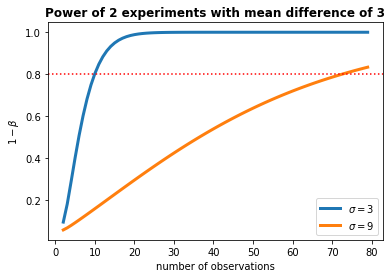

In [25]:
from statsmodels.stats.power import TTestPower

mean_diff = 3

powers_3 = [
    TTestPower().power(effect_size=mean_diff/3, alpha=0.05, nobs=n) for n in range(80)
]
powers_9 = [
    TTestPower().power(effect_size=mean_diff/9, alpha=0.05, nobs=n) for n in range(80)
]

plt.plot(powers_3, label=r'$\sigma=3$',lw=3)
plt.plot(powers_9, label=r'$\sigma=9$',lw=3)
plt.axhline(y=0.8, ls=':', c='red')
plt.xlabel("number of observations")
plt.ylabel(r"$1 - \beta$")
plt.title(f"Power of 2 experiments with mean difference of {mean_diff}", fontdict={'weight': 'bold'})
plt.legend();

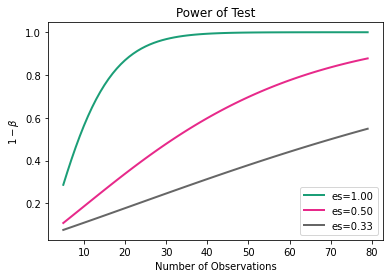

In [37]:
from statsmodels.stats.power import TTestIndPower
effect_sizes = np.array([3/3, 3/6, 3/9])
sample_sizes = np.arange(5, 80)
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.ylabel(r"$1 - \beta$");

#### Plot achieved power of a paired T-test using pingouin

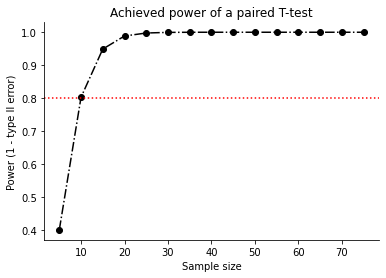

In [38]:
import pingouin as pg

d = 1.0  # Fixed effect size
n = np.arange(5, 80, 5)  # Incrementing sample size

# Compute the achieved power
pwr = pg.power_ttest(d=d, n=n, contrast='paired', alternative='two-sided')

# Plotting
plt.plot(n, pwr, 'ko-.')
plt.axhline(0.8, color='r', ls=':')
plt.xlabel('Sample size')
plt.ylabel('Power (1 - type II error)')
plt.title('Achieved power of a paired T-test')
sns.despine()

### Choosing a sample size (power analysis)

Sample size calculations require that you specifiy the desired significance level and power, the minimum effect size for which you are looking, and the scatter (SD) of the data or the expected proportion.

You need larger samples when you are looking for small effect, when the SD is large, and when you desire lots of statistical power.

See also the calculators [G*Power](www.gpower.hhu.de) for comparing means, and [Power and Sample Size](www.powerandsamplesize.com).

#### Calculating the predicted FPRP as part of interpreting a sample size statement

The FPRP can also be calculated for a proposed experiment from the choices of significance level and power, and an estimate of the prior odds that H0 is true.

In the table below, with conventional 80% power and significance level of 0.05, if we set the prior probability to 1%, i.e. a speculative theory or no prior data to support it, the corresponding FPRP is 86.1%. In such an experiment, there would be an 86% chance that this is a false positive, and then <1% of the experiments will be true positive (80% of the 1% of the experiments where the experimental hypothesis is true). With a much higher prior probability of 50%, i.e. a study based on solid theory and/or prior data, the FPRP is 5.9%. If sich experiment resulted ina P value < 0.05, there would be only about 6% chance that it is a false positive, which is not unreasonable and a rather well-designed study.

In [28]:
a=1
b=10
c=25
d=50

print("Expected FPRP as a function of choices for alpha")
print("and power and an estimate of the prior probability\n")

print(f"alpha\tpower\t{a}%\t{b}%\t{c}%\t{d}%")
print("---------------------------------------------", end='')

for alpha in [.05, .01, .001]:
    print(f"\n{alpha:4.3f}", end="")
    
    for power in [80, 90, 95, 99]:
        print(f"\n\t{power}%", end="")
        
        for proba in [a,b,c,d]:
            print(f"\t{100*((1-proba/100)*alpha)/(((1-proba/100)*alpha)+(proba/100*power/100)):3.1f}%", end="")

Expected FPRP as a function of choices for alpha
and power and an estimate of the prior probability

alpha	power	1%	10%	25%	50%
---------------------------------------------
0.050
	80%	86.1%	36.0%	15.8%	5.9%
	90%	84.6%	33.3%	14.3%	5.3%
	95%	83.9%	32.1%	13.6%	5.0%
	99%	83.3%	31.3%	13.2%	4.8%
0.010
	80%	55.3%	10.1%	3.6%	1.2%
	90%	52.4%	9.1%	3.2%	1.1%
	95%	51.0%	8.7%	3.1%	1.0%
	99%	50.0%	8.3%	2.9%	1.0%
0.001
	80%	11.0%	1.1%	0.4%	0.1%
	90%	9.9%	1.0%	0.3%	0.1%
	95%	9.4%	0.9%	0.3%	0.1%
	99%	9.1%	0.9%	0.3%	0.1%

#### Complexities when computing sample size

- How to choose $\alpha$
    - Think about **prior probability** and FPRP
    - One-tail or two-tail P value
- How to choose desired statistical power
    - Choose a value of $\alpha$ and power that will give a **reasonably low FPRP**
    - also think about the relative consequences of making type I and type II errors
- How to choose the effect size
    - Sample size calculations should be based on **the smallest effect size that is worth detecting scientifically**
    - Don't compute sample size based only on published effect sizes
    - Don't compute sample size based only on standard effect sizes
    - Don't compute sample size based on the effect size you expect to see
- How to estimate the expected variability
    - Before planning a large study, try hard to **lower the SD**
    - Standard deviations determined in small pilot experiments may be too low (see table below)
    - Standard deviations reported in publications may be too low
    - Sometimes it is easier to estimate the **ratio of effect size to SD**, i.e.:
>we want to detect an effect size equal to half the SD
>we want to detect an effect size equal to 1.5 times the SD
- How to plan for unequal sample sizes
    - The trade-off is, if we reduce the number of participants in one group, we must increase the number in the other group even more, i.e. by 50% if reduced by 25% in one group, or triple the size of the group if reduced by 40% in the other group
- How to plan for dropouts
    -If we expect 20% of the participants to drop out, we should start with a 20% larger sample size than calculated
- Take advantage of pairing when you can, the total sample size required is twice that reported by the sample size program

In [29]:
def W(n, alpha=1 - 0.95):
    t2=stats.chi2(df=n-1).ppf(alpha/2) # based on the equation from Sheskin 2011
    t1=stats.chi2(df=n-1).ppf(1-(alpha/2))
    return np.sqrt((n-1)/t1), np.sqrt((n-1)/t2)
    
n_samples = [2,3,5,10,25,50,100,500,1000]

print("95% CI of a SD\n")
print("n\t95% CI of SD")
print("------------------------------", end='')

for n in n_samples:
    print(f"\n{n}", end="")
    print(f"\t{W(n)[0]:.2f} * SD - {W(n)[1]:05.2f} * SD", end="")

95% CI of a SD

n	95% CI of SD
------------------------------
2	0.45 * SD - 31.91 * SD
3	0.52 * SD - 06.28 * SD
5	0.60 * SD - 02.87 * SD
10	0.69 * SD - 01.83 * SD
25	0.78 * SD - 01.39 * SD
50	0.84 * SD - 01.25 * SD
100	0.88 * SD - 01.16 * SD
500	0.94 * SD - 01.07 * SD
1000	0.96 * SD - 01.05 * SD

### Examples

#### Comparing weights of men and women

* The mean difference is known from data = 16 kg
* The SD is also know = 17 kg
* $1-\beta = 80\%$
* $\alpha = 5\%$

In [30]:
from statsmodels.stats.power import tt_ind_solve_power
 
mean_diff = 16
sd_diff = 17
std_effect_size = mean_diff / sd_diff
power = 0.8
alpha = 0.05
 
n = tt_ind_solve_power(
    effect_size=std_effect_size,
    alpha=alpha,
    power=power,
    ratio=1, # ratio of the number of observations in sample 2 relative to sample 1
    alternative='two-sided')
 
print(f"Number in *each* group: {n:.0f}")

Number in *each* group: 19


If we collect weights from 19 men and 19 women in many experiments, assuming SD is close to correct, we'd expect that the margin of error of 80% of these intervals will be smaller that the effect size, so the CI will extend less than 16 kg in each direction.

Say differently, we'd expect to find a statistically significant difference (P<0.05) in 80% of the experiments.

#### Comparing two proportions (A/B test)

- complication rate = 5% (5/100)
- absolute change detected = 2% (from 5/100 to 3/100)
- $\alpha = 0.05$
- $1-\beta=90\%$

$$n=(Z_{\alpha/2}+Z_\beta)^2 \times \frac{p_1(1-p_1)+p_2(1-p_2)}{p_1-p_2}$$

with p1 and p2 the expected sample propotions of the two groups, $Z_{\alpha/2}$ the critical value of the Normal distribution at $\alpha/2$, e.g. for a significance level of 95%, the critical values equal 1.96.

In [31]:
p1= 5/100 # baseline proportion in %
d = 2/100 # absolute percent difference
p2 = p1-d
alpha = 0.05
beta = 1 - .9

Za = stats.norm.ppf(1-(alpha/2))
Zb = np.abs(stats.norm.ppf(beta))

n = (Za + Zb)**2 * ( p1*(1-p1) + p2*(1-p2) ) / (p1 - p2)**2

print(f"{n:.0f} individues are needed in each group")

2012 individues are needed in each group


Assume that the true difference between proportions is 0.02, imagine we perform many experiments with n=2012 per group in each experiment, because of random sampling, you expect to see difference larger than 0.02 half of the time and smaller than 0.02 the other half of the time. In 90% of those experiments, you expect to find a statistically singificant result with P<0.05 (two-tailed), and in the remaining 10% you expect to observe a difference that is not statistically significant (type II error).

Say differently, you'll expect that the margin of error to be less than 0.02 in 90% of the experiments, i.e. you expect the 90% CI to extend less than 0.02 in each direction in 90% of these hypothetical experiments.

### Other approaches to choosing sample size

- adaptive trials
- simulations

## Testing for equivalence or noninferiority

When testing a generic drug, the FDA defines two drug formulations to be (bio)equivalent when the ratio of their peak concentrations in blood plasma and the entire 90% CI of the ratio is between 0.80 and 1.25 (the reciprocal of 80% is 1/0.8=125%).

When 90% CI lie entirely within the equivalence zone, the drugs are equivalent to the  standard drug with which they are being compared.

When the 90% CI lie totally outside the equivalence zone, the drug is proved to be not equivalent.

When the 90% CI is partly within the equivalence zone and partly outside, the data are not conclusive.

When the lower limit of the 90% CI exceeds 80%, noninferiority is proved, i.e. the 90% CI is in a range that either shows the new drug is superior of shows that the new drug is slighlty inferior but still in the zone defined to be practically equivalent

![Defining superiority, equivalence and non-inferiority in clinical trials](https://www.researchgate.net/profile/James-Beeson/publication/258525159/figure/fig2/AS:267840339050505@1440869521913/Defining-superiority-equivalence-and-non-inferiority-in-clinical-trials-of_W640.jpg)

### Applying the usual approach of statistical hypothesis testing to testing for equivalence

The approach is to pose **two distinct null hypotheses and define statistical significance using two one-sided tests (TOST)**:
* the mean value of the ratio is greater than 0.80 and this increase is statistically significant with a one-sided P value less than 0.05
* the mean value of the ratio is less than 1.25 and this decrease is statistically significant with one-sided P value less than 0.05

## Sensitivity, Specificity and Receiver Operating Characteristic curves

### Accuracy of tests

Decinding whether a clinical laboratory result is normal or abnormal relies on logic very similar to that used in deciding whether a finding is statistically significant or not:

- False Negative (FN): result is _normal_ when patient _has disease_;  
- False Positive (FP): result is _abnormal_ when patient really _has no disease_.

The accuracy of a diagnostic test is quantified by its sensitivity and specificity:

- **Sensitivity** = fraction of all those _with disease_ who get a _positive_ test result= $\frac{\text{Positive result}}{\text{All with Disease}} = \frac{A}{A+C} $.
- **Specificity** = fraction of those _without disease_ who get a _negative_ test result=$ \frac{\text{Negative result}}{\text{All without Disease}} = \frac{D}{B+D} $.

Neither the specificity nor the sensitivity answers the most important questions:
> If the test is positive, what is the chance that the patient really has the disease?
> And if the test is negative, what is the chance that the patient realy doesn't have the disease?

The answers to those questions are quantified by the _positive predictive value_ and the _negative predicitve value_:

- **Positive Predictive** value=$ \frac{\text{True Positives}}{\text{All Positive results}} = \frac{A}{A+B} $.
- **Negative Predictive** value=$ \frac{\text{True Negatives}}{\text{All Negative results}} = \frac{D}{C+D} $.

| &nbsp;                   | True Disease       | No Disease         | Total   |
|:------------------------ |:------------------:|:------------------:|:-------:|
| Abnormal (positive) test |          A         | B (false positive) |   A+B   |
| Normal (negative) test   | C (false negative) |         D          |   C+D   |
| Total                    |         A+C        |        B+D         | A+B+C+D |

### Example 1 - Porphyria

With this test, 82% of patients with porphyria have an abnormal test result, and 3.7% of normal people have an abnormal test result:

- This is a rare disease with prevalent of 1 for 10,000, i.e. 100 cases per million
- Sensitivity = 82%, i.e. 82 positive tests for 100 patients with porphyria
- Specificity = 100%-3.7% = 96.3%.

| &nbsp;                   | Porphyria | No Porphyria | Total     |
|:------------------------ |:---------:|:------------:| ---------:|
| Abnormal (positive) test |     82    |    36,996    |    37,078 |
| Normal (negative) test   |     18    |   962,904    |   962,922 |
| Total                    |    100    |   999,900    | 1,000,000 |

What is the probability that a patient with below threshold test results, i.e. abnormal, has porphyria? The Positive Predictive value = 82/37078 = 0.22%, which corresponds to 1 in 500 of the people with positive test result have the disease. In other words, the other 499 of 500 positive tests are **false positives**. Of the 962,922 negative test results, only 18 are false negative, the predictive value of a negative test is 99.998%.

The expected results of testing 1,000 siblings will be:

| &nbsp;                   | Porphyria | No Porphyria | Total |
|:------------------------ |:---------:|:------------:| -----:|
| Abnormal (positive) test |    410    |       19     |   429 |
| Normal (negative) test   |     90    |      481     |   571 |
| Total                    |    500    |      500     | 1,000 |

Here about 4% (410/429) of the positive tests are false positive.

### Example 2 - HIV test

Its sensitivity = 99.9% and specificity = 99.6%.  
If the _prevalence of HIV is 10%_ and we screen 1 million people:

| &nbsp;                   | True HIV | No HIV  | Total     |
|:------------------------ |:--------:|:-------:| ---------:|
| Abnormal (positive) test |  99,900  |   3,600 |   103,500 |
| Normal (negative) test   |     100  | 896,400 |   896,500 |
| Total                    | 100,000  | 900,000 | 1,000,000 |

Of those 103,500 positive tests, 3.5% will be False Positive.

If the _prevalence of HIV is 0.1%_ and we screen 1 million people:

| &nbsp;                   | True HIV | No HIV  | Total     |
|:------------------------ |:--------:|:-------:| ---------:|
| Abnormal (positive) test |    999   |   3,996 |     4,995 |
| Normal (negative) test   |      1   | 995,004 |   995,005 |
| Total                    |  1,000   | 999,000 | 1,000,000 |

Of those 4,995 positive tests, 80% will be False Positive. **The fraction of the Positive tests that are False Positives depends on the prevalence of the disease in the population tested.**

### Analogy to statistical tests

Interpreting a positive or negative test requires knowing who is tested (what the prevalence is). Similarly, the interpretation of statistical singificance depends on the scientific context, or the prior probability.

- False negative ~ Type II error
- False positive ~ Type I error
- Sensitivity ~ Power
- Specificity ~ 1 - $\alpha$

### Bayes revisited

The _likelihood ratio_ is the probability of obtaining a positive test result in a patient with the disease divided by the probability of obtaining a positive test result in a patient without the disease:

$$ \text{likelihood ratio (LRR)} = \frac{\text{sensitivity}}{1 - \text{specificity}}$$

In the porphyria example, LLR = 0.82 / (1 - 0.963) = 22.2. A person with the condition is 22.2 times more likely to get a positive test result than a person without the condition. In the HIV example, LLR = 249.75.

The posttest odds are the odds that a patient has the disease, taking into account both the test result and prior knowledge about the patient:

$$ \text{posttest odds} = \text{pretest odds} \times \frac{\text{sensitivity}}{1 - \text{specificity}} = \text{pretest odds} \times \text{likelihood ratio} $$

| &nbsp;                | Pretest | &nbsp; | LRR    | Posttest | &nbsp; |
|:--------------------- |:-------:|:------:|:------:|:--------:|:------:|
| Who was tested?       |  proba  |  odds  | &nbsp; |   odds   | proba  |
| Random screen         | 0.0001  | 0.0001 |  22.2  |  0.0022  | 0.0022 |
| Sibling               | 0.50    | 1.000  |  22.2  |   22.2   | 0.957  |
| HIV (high prevalence) | 0.1     | 0.111  | 249.75 |   27.5   | 0.965  |
| HIV (low) prevalence) | 0.001   | 0.001  | 249.75 |   0.25   | 0.200  |

with $ \text{odds} = \frac{\text{proba}}{1-\text{proba}} $ and $ \text{proba} = \frac{\text{odds}}{1 + \text{odds}} $.

## ROC curves

It's often difficult to decide where to set the <u>threshold/cut-off</u> of a test that separates a clinical diagnosis of normal from one of abnormal.

If **threshold is set high**, the _sensitivity will be low, but the specificity will be high_. Few of the positive tests will be False Positives, but many of the negative tests will be False Negatives.

If **threshold is set low**, most individuals with the disease will be detected, but the test will mistakenly diagnose many normal individuals as abnormal. The _sensitivity will be high, but the specificity will be low*_. Few of the positive tests will be False Positives, but many of the positive tests will be False Positives.

Each point of the ROC curve shows the sensitivity and specificity for one possible threshold value for deciding when a test is abnormal. Although the consequence of FP and FN are not comparable, the **best threshold** may be the one that corresponds to the point on the ROC curve that is **the closest to the upper-left corner**.

![example ROC curve](https://docs.eyesopen.com/toolkits/cookbook/python/_images/roc2img.svg)

### AUC and classifier

At the bottom-left extreme, the test never ever returns a positive test (sensitivity = 0%), even for controls (specificity = 100%). At the upper-right, the test always returns a positive test (sensitivity = 100%), even for controls (specificity = 0%).

The Area Under the Curve (AUC) is an indicator of the overall performance of the classifier, with:

- AUC = 1.0, perfect/ideal classifier;
- AUC > 0.5, good classifier;
- AUC = 0.5, random classifier;
- AUC < 0.5, classifier performing worse than random;
- AUC = 0.0, incorrect classifier.

The confusion matrix used in fine-tuning regression models loos like:

| &nbsp;     | Spam predict. | Not spam predict. |
|:---------- |:-------------:|:-----------------:|
| Real spam  |      TP       |        FN         |
| Wrong spam |      FP       |        TN         |

### Definitions

- sensitivity, recall, hit rate or TPR = $ \frac{TP}{P} = \frac{TP}{TP+FN} $
- specificity, selectivity or TNR = $ \frac{TN}{N} = \frac{TN}{TN+FP} $
- precision or PPV = $ \frac{TP}{TP+FP} = 1 - FDR $
- fall-out or FPR = $ \frac{FP}{N} = \frac{FP}{FP+TN} = 1 - TNR = 1 - \text{specificity} $
- false discovery rate (FDR) = $ \frac{FP}{FP+TP} $
- accuracy (ACC) = $ \frac{TP+TN}{F+P} = \frac{TP+TN}{TP+TN+FP+FN} $
- balanced accuracy (BA) = $ \frac{TPR + TNR}{2} $
- recall = $\frac{TP}{TP+FN}$
- F1 score = $ 2\times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}} = \frac{2 TP}{2 TP + FP + FN} $